# Departamento de Engenharia de Teleinformática

# Computação Numérica / Métodos Numéricos

# Tarcisio Ferreira Maciel, Dr.-Ing. (Professor: [maciel@ufc.br](mailto:maciel@ufc.br))

# Darlan Cavalcante Moreira, M.Sc. (Colaborador: [darlan@gtel.ufc.br](mailto:darlan@gtel.ufc.br))

## Identificação do aluno

Nome: **Alef Carneiro de Sousa**

Matrícula: **374914**

## Instruções

As questões abaixo devem ser resolvidas aqui mesmo no **Jupyter Notebook** e podem envolver tanto soluções escritas em markdown (veja sintaxe para markdown [aqui](https://daringfireball.net/projects/markdown/basics)), como soluções em código. A questão 0 abaixo serve de exemplo de como as questões devem ser resolvidas.

<div class="alert alert-warning">
**Dica:** em células markdown vocês podem usar dois espaços para criar uma quebra de linha.
</div>

----

## Questão 0

Para entender como as questões devem ser resolvidas, faça:

1. Em que país estamos?
2. Implemente uma função que retorne o dobro da entrada


## Solução de 0

<!-- Não apague o div -->
<div class="solucao alert alert-success">

Estamos no Brasil.

<!-- Não apague o div -->
</div>

In [1]:
# Solução de 2: Implementação em python
def dobro(x):
    return 2 * x

----

## Informações de entrada
Em comunicações móveis, a distorção de pequena escala introduzida pelo meio em um canal de comunicação sem fio pode ser modelada como um ganho $g(t)$ variante no tempo que afeta multiplicativamente o sinal $s(t)$ que trafega através do canal. O ganho do desvanecimento de pequena escala segue uma distribuição Rayleigh e pode ser simulado utilizando diferentes modelos. Um modelo bastante utilizado é o modelo de Jakes no qual
$
    g(t) = \vert h(t) \vert^2 = \left\vert \frac{1}{\sqrt{L}}\sum\limits_{l = 0}^{L-1} \exp( j ( 2\pi f_{D} \cos(\phi_l) t + \varphi_l ) ) \right\vert^2,
$
onde:
- $L$ é o número de multi-percursos do canal (raios ou caminhos através do qual réplicas do sinal transmitido chegam até o receptor);
- $f_D$ é o máximo desvio de frequência Doppler, dado por $f_D = \dfrac{v f_c}{c}$, onde $v$ é a velocidade do terminal móvel em m/s, $f_c$ é a frequência da portadora em Hz, e $c$ é a velocidade da luz em m/s;
- $\phi_l$ e $\varphi_l$ são variáveis aleatórias uniformemente distribuídas no intervalo $[0, 2\pi)$.

A função abaixo gera o ganho do canal para um *array* `numpy` de tempo $t$ e demais parâmetros físicos do modelo do canal ($L$, $f_c$, e $v$).

In [1]:
%matplotlib notebook
# Note que não foi feita nenhuma checagem de erros
import numpy as np
import matplotlib.pyplot as plt
def Jakes(t, f_c, v, L):
    # f_c é dada em Hertz
    # v é dada em m/s
    # c é 3 x 10^8 m/s
    c = 3e8;
    # Gera as fases aleatórias entre [0, 2*pi]
    Phi = np.pi * np.random.random(L);
    phi = np.pi * np.random.random(L);
    # Calcula o máximo desvio Doppler
    f_D = v*f_c/c
    # Calcula g usando uma python list comprehension
    g = np.array( [ np.abs((1/np.sqrt(L))*np.sum(np.exp(1j*(2*np.pi*f_D*np.cos(Phi)*x + phi))))**2 for x in t ] )
    return g

<IPython.core.display.Javascript object>


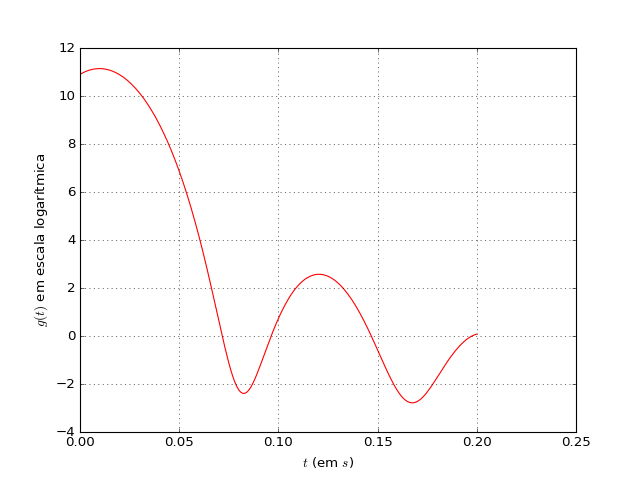

<IPython.core.display.Javascript object>


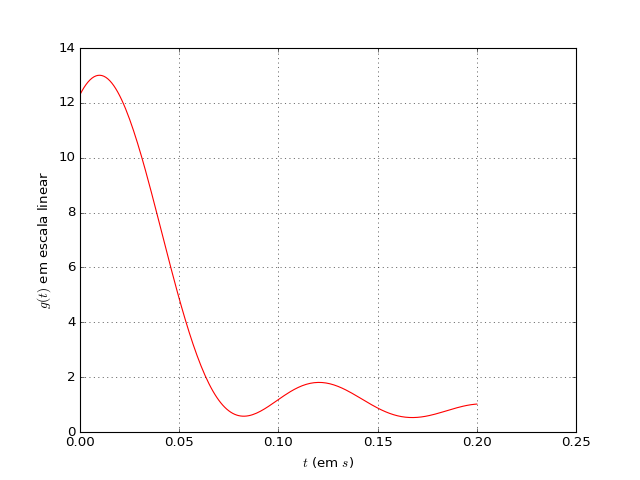

In [2]:
# Chama a função acima para gerar 201 amostras de um canal aleatório
t = np.linspace(0, 0.2, 201); # Gera um array numpy com 201 amostras uniformemente espaçadas de 1e-3
f_c = 2e9; # Frequência do sistema é de 2 GHz
v = 3/3.6; # Velocidade do móvel de 3 km/h (pedestre)
L = 20;    # O canal possui 20 multi-percursos
# Gera as amostras do canal
g = Jakes(t, f_c, v, L)
# Plota o gráfico do ganho do canal em função do tempo (eixo y em escala logarítmica)
plt.figure(1);
plt.plot(t, 10*np.log10(g), 'r-')
plt.grid()
plt.ylabel('$ g(t) $ em escala logarítmica')
plt.xlabel('$t$ (em $s$)')
plt.show()
# Plota o gráfico do ganho do canal em função do tempo (eixo y em escala normal)
plt.figure(2);
plt.plot(t, g, 'r-')
plt.grid()
plt.ylabel('$ g(t) $ em escala linear')
plt.xlabel('$t$ (em $s$)')
plt.show()

----

## Questão 1
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60$ e $80$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, $(60\times 10^{-3}, g(60\times 10^{-3}))$, $(80\times 10^{-3}, g(80\times 10^{-3}))$. Para esses 05 pares ordenados $(x_i, y_i)$, calcule os coeficientes do polinômio interpolador de quarta ordem resolvendo o sistema de 05 equações $p(x_i) = y_i$ para $i = 1, 2, 3, 4$ e $5$, implementando para tanto o método da eliminação de Gauss. Plote num mesmo gráfico os valores de $g(t)$ e os valores de seu $p(t)$ para $t = 0$ até $80$ ms com passo de $1$ ms.

In [3]:
# IMPLEMENTAÇÃO DA QUESTÃO 3

# Implementando a Eliminação de Gauss
def elimGauss(a, y):
    if type(a) != type(np.array([1])) or type(y) != type(np.array([1])):     # Verificação do tipo de entrada
        print("As entradas devem ser do tipo numpy.array!")
        
        return
    
    if len(a) != len(a[0]) or len(a) != len(y):                              # Verificação da dimensão das entradas
        print("As entradas não possuem as dimensões corretas!")
        print("O primeiro argumento deve conter uma matriz de dimensão NxN e o o segundo deve conter um vetor de dimensão N.")
        
        return
        
    matrizEst = np.zeros([len(a), len(a) + 1])              # Criando matriz estendida
    # Passando valores dos coeficientes para a matriz estendida
    for i in range(0, len(a)):
        for j in range(0, len(a)):
            matrizEst[i][j] = a[i][j]
    
    # Passando valores do vetor de respostas para a matriz estendida
    for i in range(0, len(a)):
        matrizEst[i][len(a)] = y[i]
        
    # Escalonamento
    for i in range(0, len(matrizEst) - 1):
        for j in range(i + 1, len(matrizEst)):
            m = matrizEst[j][i]/matrizEst[i][i]
            for k in range(0, len(matrizEst[0])):
                matrizEst[j][k] -= matrizEst[i][k]*m
    
    
    x = np.array([])                                  # Criando vetor com os valores de x
    # Substituição recursiva e preenchimento do vetor x
    for i in np.arange(len(matrizEst) - 1, -1, -1):
        for j in range(0, len(x)):
            matrizEst[i][len(matrizEst[i])-1] -= matrizEst[i][i+j+1]*x[j]   # Substituição
        aux = matrizEst[i][len(matrizEst[i])-1]/matrizEst[i][i]             # Descobrindo xi
        x = np.insert(x, 0, aux)                                            # Inserindo xi no vetor
        
    return x

# Implementando o método de interpolação
def interpolacao(x, amostra_x, amostra_y):
    #Conversão das listas para array
    x = np.array(x)
    amostra_x = np.array(amostra_x)
    amostra_y = np.array(amostra_y)
    # Verificando se as entradas possuem a mesma dimensão
    if len(amostra_x) != len(amostra_y):
        print("Os vetores de entrada devem ter a mesma dimensão!")
        
        return
    
    # Verificando se as entradas possuem a dimensão certa
    if len(x) <= 0 or len(amostra_x) <= 0:
        print("Os vetores de entrada devem possuir dimensão maior ou igual a 1.")
        
        return
    
    ordem = len(amostra_x)
    matrizA = np.zeros([ordem, ordem])                   # Criando matriz A que será passada para elimGauss()
    # Preenchimento da matriz matrizA
    for i in range(0, len(amostra_x)):
        for j in range(0, len(amostra_x)):
            matrizA[i][j] = amostra_x[i]**j
    
    coef = elimGauss(matrizA, amostra_y)       # Criando vetor de coeficientes gerados pela elimGauss
    p = np.zeros(len(x))                       # Criando vetor do polinômio interpolador
    # Gerando o polinômio interpolador
    for i in range(0, len(coef)):
        p += coef[i]*(x**i)
        
    return p

<IPython.core.display.Javascript object>


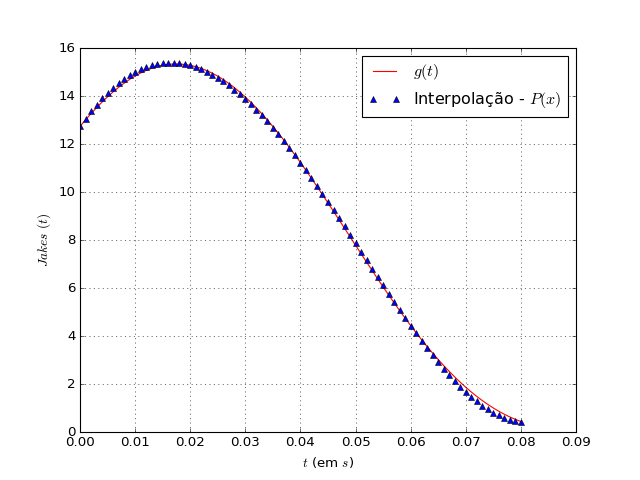

In [4]:
# CASO TESTE

%matplotlib notebook

t = np.arange(0, 81*(10**(-3)), 20*(10**(-3)))       #Lista com os valores x da amostra
x = np.arange(0, 81*(10**(-3)), 10**(-3))            #Lista com os valores x que serão aplicados ao polinomio interpolador
g = Jakes(x, f_c, v, L)                              #Lista com os valores y da função Jakes
amostra_g = [g[0], g[20], g[40], g[60], g[80]]       #Lista com os valores y da amostra

# Plot dos gráficos, em vermelho teremos a Jakes original (g(t)) e de azul a função interpolada
plt.plot(x, g, "r", label="$g(t)$")
plt.plot(x, interpolacao(x, t, amostra_g), "b^", label="Interpolação - $P(x)$")
plt.legend()
plt.xlabel("$t$ (em $s$)")
plt.ylabel("$Jakes$ $(t)$")
plt.grid()
plt.show()

## Questão 2
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 10, 20, 30$ e $40$ ms. Escreva sua própria função `polyfit` para realizar a regressão polinomial e calcular os polinômios de primeira, segunda e terceira ordem que melhor se ajustam aos dados. Confira seus resultados utilizando a função `polyfit` padrão do `numpy`. Plote gráficos de seus polinômios regressores e dos dados reais da função `Jakes`.

In [42]:
# IMPLEMENTAÇÃO DA FUNÇÃO POLYFIT

# Definindo a função polyfit
def polyfit(x, y, ordem=0):
    # Transformando os valores de entrada em um array
    x = np.array(x)
    y = np.array(y)

    Sxs = np.zeros([ordem + 1, ordem + 1])    # Criando a matriz que receberá os valores dos somatórios de x (matriz de coeficientes)
    Sxs[0][0] = len(x)                        # Atribuindo ao primeiro valor da matriz o valor n (número de amostras)
    
    if len(y) != Sxs[0][0]:    # Verificando se os vetores de entrada possuem o mesmo tamanho
        print("Os vetores de entrada (x,y) devem ter o mesmo tamanho!")
        
        return
    
    if ordem < 0:              # Verificando se a ordem é maior ou igual a zero
        print("Ordem deve ser maior ou igual a 0(zero)!")
        
        return
    
    # Inicalização do array Sys (vetor dos somatórios y) e atribuindo o primeiro valor
    Sys = np.array(np.sum(y))
    # Preenchimento da matriz dos coeficientes e do vetor Sys
    if ordem > 0:
        for i in range(0, ordem + 1):
            for j in range(0, ordem + 1):
                Sxs[i][j] = np.sum(x**(i + j))
        for i in range(1, ordem + 1):
            Sys = np.append(Sys, np.sum(y*(x**i)))
            
    # Resolvendo o sistema com a função solve() da numpy.linalg
    a = np.linalg.solve(Sxs, Sys)
    
    # Retornando o vetor invertido para que os coeficientes fiquem na mesma posição que da função numpy.polifity()
    return a[::-1]

<IPython.core.display.Javascript object>


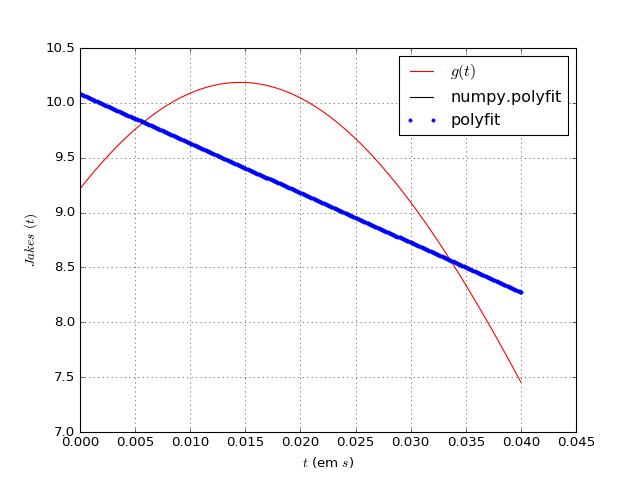

<IPython.core.display.Javascript object>


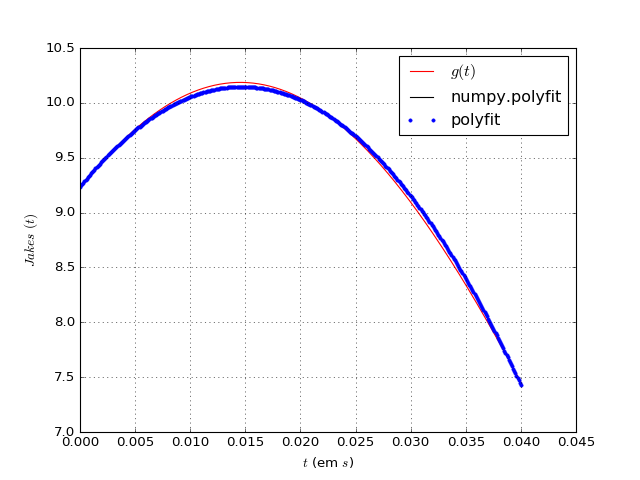

<IPython.core.display.Javascript object>


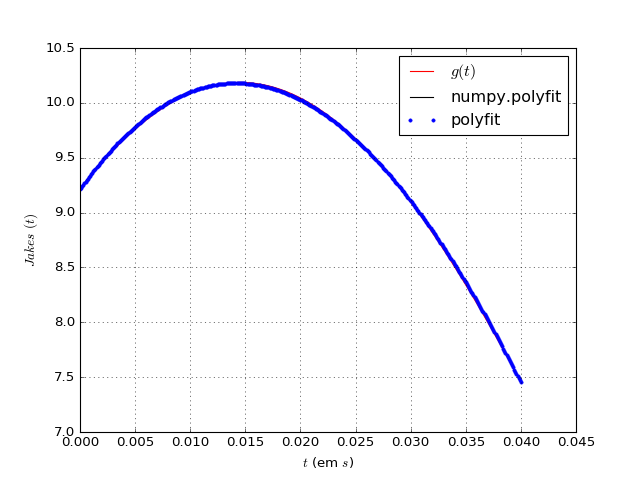

In [43]:
# CASO TESTE

%matplotlib notebook

t = np.arange(0, 0.0401, 0.0001)        # Criando vetor tempo
g = Jakes(t, f_c, v, L)                 # Gerando os valores da função Jakes para os valores de t

# Função que gera os valores de Y dado os valores de x e o vetor de coeficientes
def geraY(x, coef):
    func = 0
    for i in range(0, len(coef)):
        func = func + coef[len(coef) - i - 1]*(x**i)
    
    return func

# Como a função Jakes utiliza valores que são gerados aleatoriamente,
# não é possível chamar a função mais de uma vez e esperar as mesmas curvas
x = np.arange(0, 0.05, 0.01)                   # Valores de x para a amostra das funções polyfit
y = [g[0], g[100], g[200], g[300], g[400]]     # Valores de y para a amostra das funções polyfit
# Não foi possível utilizar uma função para pegar os valores de y para qualquer amostra de t, pois foram encontrados problemas de precisão que interferiram no resultado

# Abaixo está o plot das 3 funções
# Primeiro é feito o plot de Jakes(), em seguida da função polyfit do numpy e por último da função polyfit criada

# Plot com polyfit de 1º ordem
ordem = 1        # Parâmetro que define a ordem a ser usada na regressão
plt.figure(1)
plt.plot(t, g, 'r', label="$g(t)$")
plt.plot(t, geraY(t, np.polyfit(x, y, ordem)), 'k', label="numpy.polyfit")
plt.plot(t, geraY(t, polyfit(x, y, ordem)), 'b.', label="polyfit")
plt.legend()
plt.xlabel("$t$ (em $s$)")
plt.ylabel("$Jakes$ $(t)$")
plt.grid()

# Plot com polyfit de 2º ordem
ordem = 2        # Parâmetro que define a ordem a ser usada na regressão
plt.figure(2)
plt.plot(t, g, 'r', label="$g(t)$")
plt.plot(t, geraY(t, np.polyfit(x, y, ordem)), 'k', label="numpy.polyfit")
plt.plot(t, geraY(t, polyfit(x, y, ordem)), 'b.', label="polyfit")
plt.legend()
plt.xlabel("$t$ (em $s$)")
plt.ylabel("$Jakes$ $(t)$")
plt.grid()

# Plot com polyfit de 3º ordem
ordem = 3        # Parâmetro que define a ordem a ser usada na regressão
plt.figure(3)
plt.plot(t, g, 'r', label="$g(t)$")
plt.plot(t, geraY(t, np.polyfit(x, y, ordem)), 'k', label="numpy.polyfit")
plt.plot(t, geraY(t, polyfit(x, y, ordem)), 'b.', label="polyfit")
plt.legend()
plt.xlabel("$t$ (em $s$)")
plt.ylabel("$Jakes$ $(t)$")
plt.grid()

# Obs.: talvez seja necessário dar um zoom para que seja possível distinguir as 3 curvas

## Questão 3
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60, 80, 100$ e $120$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, ..., $(120\times 10^{-3}, g(120\times 10^{-3}))$. Implemente uma função que calcule o polinômio interpolador de Newton para esse conjunto de pontos. Plote gráficos dos dados exatos e do polinômio interpolador para $x \in [0, 120]$ ms com passo de 1 ms. Para obter bônus nessa questão, sua função deve ser flexível o suficiente para funcionar com qualquer quantidade de pontos.

In [44]:
# IMPLEMENTAÇÃO QUESTÃO 3

# Implementação da função que encontra a diferença dividida a partir de dois vetores:
# Esta função é um pouco específica para o caso da interpolação de Newton, pois ela pega um vetor
# e calcula a diferença dividida f[xn, ..., x2, x1]
def diferencaDividida(x, y):
    if len(x) != len(y):       # Verificando se as entradas possuem a mesma dimensão
        print("Os vetores de entrada devem ter a mesma dimensão!")
        return
    if len(x) <= 1:            # Verificando se as entradas possuem a dimensão certa
        print("Os vetores de entrada devem ter dimensão maior ou igual a 2!")
        return
    if len(x) == 2:            # Diferença dividida para o caso base
        return (y[1] - y[0])/(x[1] - x[0])
    
    return (diferencaDividida(x[1:len(x)], y[1:len(y)]) - diferencaDividida(x[0:len(x) - 1], y[0:len(y) - 1]))/(x[len(x) - 1] - x[0])

# Implementação da função que retornará os coeficientes [a0,...,an] da interpolação de Newton
def coefInterpNewton(x, y):
    if len(x) != len(y):       # Verificando se as entradas possuem a mesma dimensão
        print("Os vetores de entrada devem ter a mesma dimensão!")
        return
    if len(x) <= 0:            # Verificando se as entradas possuem a dimensão certa
        print("Os vetores de entrada devem possuir dimensão maior ou igual a 1.")
        return
    a = [y[0]]                 # Inicialização da lista de coeficientes, com a0
    for i in range(1, len(x)):
        a = np.append(a, diferencaDividida(x[0:i + 1], y[0:i + 1]))       # Preenchimento do vetor de coeficiente
        
    return a

# Implementação da função de interpolação:
# Nas entradas, que devem ser listas [], temos:
    # x: x dos pontos que queremos descobrir via interpolação
    # amostra_x: valores de x de amostra para descobrir a função de interpolação
    # amostra_y: valores de y de amostra para descobrir a função de interpolação
def interpolNewton(x, amostra_x, amostra_y):
    # Conversão das listas para array
    x = np.array(x)
    amostra_x = np.array(amostra_x)
    amostra_y = np.array(amostra_y)
    # Verificando se as entradas possuem a mesma dimensão
    if len(amostra_x) != len(amostra_y):
        print("Os vetores de entrada devem ter a mesma dimensão!")
        
        return
    
    # Verificando se as entradas possuem a dimensão certa
    if len(x) <= 0 or len(amostra_x) <= 0:
        print("Os vetores de entrada devem possuir dimensão maior ou igual a 1.")
        
        return
    
    coef = coefInterpNewton(amostra_x, amostra_y)     # Passando os valores dos coeficientes [a0,...,an] para uma variável
    p = coef[0]                                       # Inicializando o resultado p com a0
    # Para os casos de ordem maior que 0 o valor de p é incrementado com o código abaixo
    for i in range(1, len(amostra_x)):
        termo = coef[i]
        for j in range(0, i):
            termo = termo*(x - amostra_x[j])
        p = p + termo
        
    return p

<IPython.core.display.Javascript object>


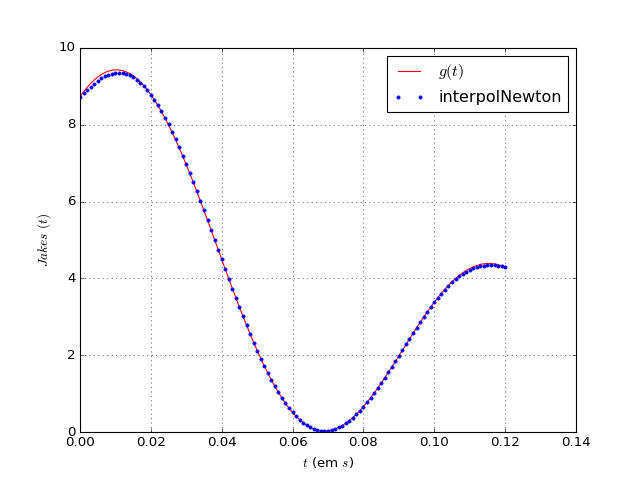

In [46]:
# CASO TESTE

%matplotlib notebook

t = np.arange(0, 121*(10**(-3)), 20*(10**(-3)))       # Lista com os valores x da amostra
x = np.arange(0, 121*(10**(-3)), 10**(-3))            # Lista com os valores x que serão aplicados ao polinomio interpolador
g = Jakes(x, f_c, v, L)                               # Lista com os valores y da função Jakes
amostra_g = [g[0], g[20], g[40], g[60], g[80], g[100], g[120]]        # Lista com os valores y da amostra

# Plot dos valores no gráfico, de vermelho teremos a função Jakes e de azul os valores obtidos por interpolação
plt.plot(x, g, 'r', label="$g(t)$")
plt.plot(x, interpolNewton(x, t, amostra_g), 'b.', label="interpolNewton")
plt.legend()
plt.xlabel("$t$ (em $s$)")
plt.ylabel("$Jakes$ $(t)$")
plt.grid()
plt.show()

## Questão 4
Utilize a função `Jakes` fornecida anteriormente para gerar 05 amostras de canal para $t = 0, 20, 40, 60, 80, 100$ e $120$ ms, ou seja, gere os pares ordenados $(0, g(0))$, $(20 \times 10^{-3}, g(20\times 10^{-3}))$, $(40\times 10^{-3}, g(40\times 10^{-3}))$, ..., $(120\times 10^{-3}, g(120\times 10^{-3}))$. Implemente a interpolação por *splines* cúbicas naturais para o conjunto de dados fornecido. Plote gráficos dos dados exatos e das *splines* para $x \in [0, 120]$ ms com passo de 1 ms. Considere as mesmas condições estabelecidas na seção 5.6.3 do livro *Métodos Numéricos para Engenheiros e Cientistas* de *Amos Gilat & Vish Subramaniam*. Para obter bônus nesse item, sua função deve ser flexível o suficiente para funcionar com qualquer quantidade de pontos.


In [49]:
# Implementação da função splines cúbica
def splines3(x, amostra_x, amostra_y):
    # Conversão das listas para array
    x = np.array(x)
    amostra_x = np.array(amostra_x)
    amostra_y = np.array(amostra_y)
    # Verificando se as entradas possuem a mesma dimensão
    if len(amostra_x) != len(amostra_y):
        print("Os vetores de entrada devem ter a mesma dimensão!")
        
        return
    
    # Verificando se as entradas possuem a dimensão certa
    if len(x) <= 0 or len(amostra_x) <= 0:
        print("Os vetores de entrada devem possuir dimensão maior ou igual a 1.")
        
        return
    
    # Criação e preenchimento do vetor h que contém o intervalo entre duas amostras consecutivas
    h = np.array([])
    for i in range(0, len(amostra_x) - 1):
        h = np.append(h, amostra_x[i+1] - amostra_x[i])
    
    # Criação e preenchimento da matrizA de coeficiente e o vetorY de resultados
    matrizA = np.zeros([len(amostra_x)-2, len(amostra_x)-2])
    vetorY = np.zeros(len(amostra_x) - 2)
    for i in range(0, len(amostra_x) - 2):
        matrizA[i][i] = 2*(h[i] + h[i+1])
        vetorY[i] = 6*((amostra_y[i+2] - amostra_y[i+1])/h[i+1] - (amostra_y[i+1] - amostra_y[i])/h[i])
        if i == 0:
            matrizA[i][i+1] = h[i+1]
            continue
        elif i == len(amostra_x) - 3:
            matrizA[i][i-1] = h[i]
            continue
        else:
            matrizA[i][i+1] = h[i+1]
            matrizA[i][i-1] = h[i]
    
    # Passando para coef os coeficientes [a1, ..., an]
    # Obs.: como a1 e an são iguais à zero, só foram calculados pela elimGauss os coeficientes internos
    coef = np.insert([0., 0.], 1, elimGauss(matrizA, vetorY))
    
    resultado = np.array([])             # Criando array que receberá será constituído pela junção dos f_i(x)
    contador = 0                         # Criando um contador para marcar em qual intervalo estamos
    inicio = 0                           # Criando variável responsável por marcar o início do subintervalo
    # Preenchimento de resultado[]
    for i in range(0, len(x)):
        if i < len(x) - 1:               # Devido a como foi feito a lógica, foi necessário separar o caso do último intervalo
            if x[i+1] > amostra_x[contador+1]:              #Verificando chegada ao final do intervalo
                # fx_i vai receber o valor de f_i(x) para um determinado intervalo
                fx_i = ((amostra_x[contador+1] - x[inicio:i+1])**3)*coef[contador]/(6*h[contador]) + ((x[inicio:i+1] - amostra_x[contador])**3)*coef[contador+1]/(6*h[contador]) + (amostra_x[contador+1] - x[inicio:i+1])*(amostra_y[contador]/h[contador] - coef[contador]*h[contador]/6) + (x[inicio:i+1] - amostra_x[contador])*(amostra_y[contador+1]/h[contador] - coef[contador+1]*h[contador]/6)
                resultado = np.append(resultado, fx_i)        # O valor de f_i(x) calculado é passado para resultado[]
                inicio = i + 1     # Atualizando variável inicio (para evitar que um ponto seja incluído duas vezes as novas variáveis início marcarão o primeiro ponto interno do subintervalo)
                contador += 1      # Atualizando o valor do contador
        else:                            # Caso em que chegamos ao último ponto e devemos incluir o último intervalo
            if x[i] == amostra_x[contador+1]:
                fx_i = ((amostra_x[contador+1] - x[inicio:i+1])**3)*coef[contador]/(6*h[contador]) + ((x[inicio:i+1] - amostra_x[contador])**3)*coef[contador+1]/(6*h[contador]) + (amostra_x[contador+1] - x[inicio:i+1])*(amostra_y[contador]/h[contador] - coef[contador]*h[contador]/6) + (x[inicio:i+1] - amostra_x[contador])*(amostra_y[contador+1]/h[contador] - coef[contador+1]*h[contador]/6)
                resultado = np.append(resultado, fx_i)
            
    return resultado

<IPython.core.display.Javascript object>


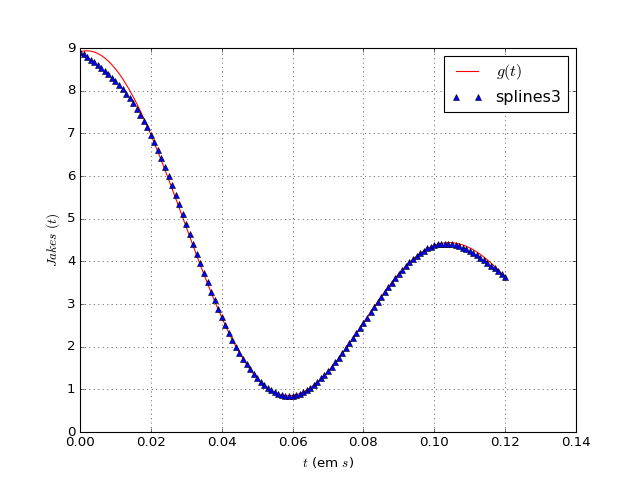

In [54]:
# CASO TESTE

%matplotlib notebook

t = np.arange(0, 121*(10**(-3)), 20*(10**(-3)))       #Lista com os valores x da amostra
x = np.arange(0, 121*(10**(-3)), 10**(-3))            #Lista com os valores x que serão aplicados ao polinomio interpolador
g = Jakes(x, f_c, v, L)                               #Lista com os valores y da função Jakes
amostra_g = [g[0], g[20], g[40], g[60], g[80], g[100], g[120]]        #Lista com os valores y da amostra

#Plot dos valores no gráfico, de vermelho teremos a função Jakes e de azul os valores obtidos por interpolação
plt.plot(x, g, 'r', label="$g(t)$")
plt.plot(x, splines3(x, t, amostra_g), 'b^', label="splines3")
plt.legend()
plt.xlabel("$t$ (em $s$)")
plt.ylabel("$Jakes$ $(t)$")
plt.grid()
plt.show()

----

# Aparência do Notebook

A célula abaixo contém código cuja única finalidade é modificar a aparência do notebook após a célula ser executada.

In [11]:
from IPython.core.display import HTML, display

# O arquivo styles.css deve estar na mesma pasta que o notebook
def css_styling():
    try:
        styles = open("./styles.css", "r").read()
        html = "<style>{0}</style>".format(styles)
    except FileNotFoundError:
        html = "<b style=\"font-size: 25px\">Arquivo 'styles.css' não encontrado</b>"
    return HTML(html)
display(css_styling())